## Презентация на тему
# Гипергеометрическое распределение

## Подготовили:
Журик Никита Сергеевич,
4 курс, 6 группа,
Казимиров Владислав Евгеньевич,
4 курс, 6 группа
## Преподаватель:
Пирштук Иван Казимирович

## Определение

Гипергеометрическое распределение моделирует вероятность выбора $k$ объектов класса $1$ из выборки, в которой $N$ объектов, из которых всего $K$ принадлежат классу $1$.

Случайная величина $\xi$ распределена по гипергеометрическому закону, если $$P(\xi = k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$.

При должном уровне наблюдательности можно заметить, что в числителе есть не что иное как вероятность выбрать из $N$ объектов двух классов $k$ объектов класса $1$ и $n-k$ объектов класса $0$. В знаментателе же общее число способов выбрать из $N$ объектов $n$.

## Свойства

Доказательство $\sum_k P(\xi=k) = 1$ просто и, тем не менее, красиво, так как тесно связано с занимательным фактом из комбинаторики, носящим название тождества Вандермонда:
$$\sum_{k=0}^r \binom{m}{k}\binom{n}{r-k} = \binom{m+n}{r}$$

Очевидно, вероятность выбрать $k+i, \ i > 0$ объект класса $1$ равна $0$. Тогда $$\sum_{k=0}^n \binom{K}{k}\binom{N-K}{n-k} = \binom{N}{n}$$

Таким образом, сумма вероятностей действительно равна $1$.

Покажем, что $\mathbb{E}\{\xi\} = n\frac{K}{N}$ $\left(\binom{N}{k} = 0 \ \forall k \neq \overline{0, N}\right)$:

\begin{align}
\mathbb{E}\{\xi\} &= \frac{1}{\binom{N}{n}}\sum_{k=0}^n k\binom{K}{k}\binom{N-K}{n-k} \\
&= \frac{1}{\binom{N}{n}}\sum_{k=1}^n k\binom{K}{k}\binom{N-K}{n-k} \\
&= \frac{1}{\binom{N}{n}}\sum_{k=1}^n K\binom{K-1}{k-1}\binom{N-K}{n-k} \\
&= \frac{1}{\binom{N}{n}}\sum_{k=0}^{n-1} K\binom{K-1}{k}\binom{N-K}{n-1-k} \\
&= \frac{K}{\frac{N}{n}\binom{N-1}{n-1}}\binom{N-1}{n-1} \\
&= \frac{nK}{N}
\end{align}

При помощи похожих преобразований можно показать $$\mathbb{D}\{\xi\} = \frac{nK(N-K)(N-n)}{N^2(N-1)}$$

## Картиночки

In [1]:
from statmod2 import HypergeometricDistributionInverse

N = 500
D = 150
n = 50

dist = HypergeometricDistributionInverse(N=N, D=D, n=n)

sample_size = 10000

samples = dist((sample_size,))

### Функция распределения

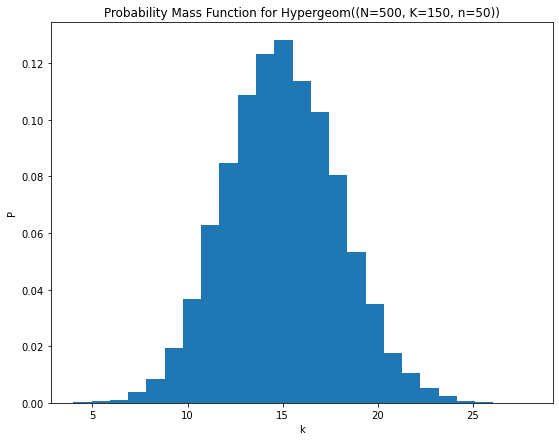

In [3]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(9, 7))
plt.hist(samples, bins = n // 2, weights=1/sample_size * np.ones_like(samples))
plt.xlabel('k')
plt.ylabel('P')
plt.title(f'Probability Mass Function for Hypergeom((N={N}, K={D}, n={n}))')
plt.show()

### Кумулятивная функция распределения

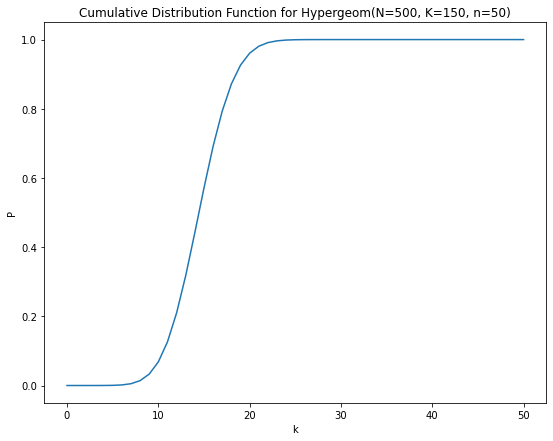

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(9, 7))
plt.plot(dist.cdf)
plt.xlabel('k')
plt.ylabel('P')
plt.title(f'Cumulative Distribution Function for Hypergeom(N={N}, K={D}, n={n})')
plt.show()

## Применение

Наиболее частая область применения гипергеометрического распределения в социологических исследованиях, но данное распределение находит применение и в других доменных областях.

Начнём с чего-то простого:

К примеру, вам дана колода из 20 карт: 6 красных карт и 14 синих карт. Вы берёте 5 случайных карт из колоды. Какова вероятность, что у вас на руке оказалось ровно 4 красных карты?

Биномиальное распределение в данном случае не подходит, так как карты были взяты без возврата в колоду. На помощь приходит гипергеометрическое, а именно:

$$ P(X = k) = \frac{\binom{6}{4} \binom{14}{1}}{\binom{20}{5}} = 0.0135 $$

Теперь перейдём к более реалистичному примеру. Гипергеометрическое распределение часто используется в социологии или на производстве для определения, какая группа недопреставлена в генерально совокупности или наоборот представлена слишком широко.

Допустим, вы знаете, что завод производит около 100 запчастей каждый день. Они фасуются в коробки по 500 деталей каждую неделю. Ваш покупатель исследует каждую коробку, отбирая из неё 25 случайных запчастей и исследуя их на дефекты. Распределение, которое он при этом получит, как раз и является гипергеометрическим и может быть использовано для анализа, какой же процент запчастей всё-таки дефектный.

In [5]:
from statmod2 import HypergeometricDistributionInverse

N = 500
D = 10
n = 25

dist = HypergeometricDistributionInverse(N=N, D=D, n=n)

sample_size = 10000

samples = dist((sample_size,))

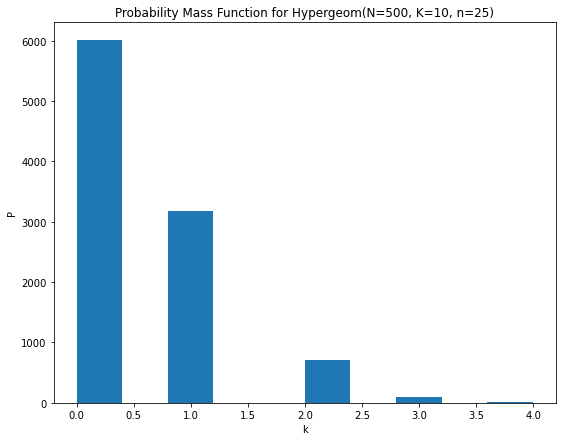

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
plt.hist(samples)
plt.xlabel('k')
plt.ylabel('P')
plt.title(f'Probability Mass Function for Hypergeom(N={N}, K={D}, n={n})')
plt.show()

Ну и последний пример из машинного обучения: когда мы делим выборку для классификации на train и test. Оказывается, прямо из определения можно заключить, что число объектов одного из классов распределено именно по этому закону.

# Моделирование случайной величины

Одним из методов генерации СВ, распределённых по гипергеометрическому закону, является метод, основанный на построении кумулятивной функции распределения. Так как множество значений СВ конечно, для каждого значения $k$ возможно найти вероятность $P(\xi \leq k)$. По аксиоме нормировки, сумма вероятностей $P(\xi = k)$ для всех $k$ равна $1$. Построенную функцию можно использовать для нахождения функции, обратной функции распределения: для генерации значения СВ достаточно сгенерировать значение БСВ и определить, какому значению $k$ оно соответствует.

Данный метод реализован в классе HypergeometricDistributionInverse во второй лабораторной работе.